## Process
##### 0. Goals
##### 1. Problem Statement
##### 2. Explore Data --> Melihat apakah data yang ingin dipakai tersedia
##### 3. Quick Explore Data --> Bentuk datanya seperti apa
##### 4. EDA --> Start EDA

Dataset: Fifa 21
https://www.kaggle.com/batuhandemirci/fifa-2021-team-and-player-dataset?select=tbl_team.csv

1. Siapa pemain dengan skill menyerang paling baik
2. Team mana yang memiliki transfer budget paling besar, top 5 siapa
3. Rata-rata nilai skill pemain per posisi itu berapa (Striker, Gelandang, Pemain Belakang)
4. ...
5. ...
6. ...

# Problem statement dibuat untuk menjawab goals: 
1. Pemain yang mana di transfer
2. Pemain yang harus dapet penghargaan

# Goals

1. 

# Approach Plan


# Explore

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/players.csv', encoding='latin1')

In [3]:
# Untuk mengambil top head/baris paling atas
df.head(2)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
0,1,Lionel AndrÃ©s Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,5,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee..."
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,5,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ..."


In [4]:
df.columns

Index(['int_player_id', 'str_player_name', 'str_positions', 'dt_date_of_birth',
       'int_height', 'int_weight', 'int_overall_rating',
       'int_potential_rating', 'str_best_position', 'int_best_overall_rating',
       'int_value', 'int_wage', 'int_team_id', 'str_nationality',
       'int_crossing', 'int_finishing', 'int_heading_accuracy',
       'int_short_passing', 'int_volleys', 'int_defensive_awareness',
       'int_standing_tackle', 'int_sliding_tackle', 'int_diving',
       'int_handling', 'int_kicking', 'int_gk_positioning', 'int_reflexes',
       'int_aggression', 'int_interceptions', 'int_positioning', 'int_vision',
       'int_penalties', 'int_composure', 'int_acceleration',
       'int_sprint_speed', 'int_agility', 'int_reactions', 'int_balance',
       'int_shot_power', 'int_jumping', 'int_stamina', 'int_strength',
       'int_long_shots', 'str_preferred_foot', 'int_weak_foot',
       'int_skill_moves', 'int_international_reputations', 'str_work_rate',
       'str_body_

In [7]:
df.head(5).T

,0,1,2,3,4
int_player_id,1,2,3,4,5
str_player_name,Lionel AndrÃ©s Messi Cuccittini,Cristiano Ronaldo dos Santos Aveiro,Jan Oblak,Kevin De Bruyne,Neymar da Silva Santos JÃºnior
str_positions,"RW, ST, CF","ST, LW",GK,"CAM, CM","LW, CAM"
dt_date_of_birth,1987-06-24,1985-02-05,1993-01-07,1991-06-28,1992-02-05
int_height,170,187,188,181,175
int_weight,72,83,87,70,68
int_overall_rating,93,92,91,91,91
int_potential_rating,93,92,93,91,91
str_best_position,RW,ST,GK,CAM,LW
int_best_overall_rating,93,92,91,91,91


In [7]:
# ini untuk melihat 2 baris paling akhir
df.tail(2)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
19000,19001,Ben Hough,CM,2003-06-22,175,65,47,67,CAM,51,...,1,Medium/ Medium,Lean (170-185),46,40,35,50,48,NaN,NaN
19001,19002,Mateo Nicolás Flores Cuevas,CDM,2001-01-29,174,68,47,63,CDM,48,...,1,Medium/ Medium,Normal (170-185),45,31,32,47,43,NaN,NaN


In [9]:
df.sample(5)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
505,506,Luís Carlos Almeida da Cunha,"LW, RW",1986-11-17,177,70,80,80,LW,80,...,3,High/ Medium,Lean (170-185),86,86,80,77,86,['Dribbler'],"['Injury Prone', 'Flair', 'Outside Foot Shot',..."
15964,15965,Enzo Cornelisse,"CB, CDM, CM",2003-01-01,175,65,59,77,CB,61,...,1,Medium/ Medium,Lean (170-185),42,49,35,61,55,NaN,['Long Passer (AI)']
16041,16042,Maximilian Göppel,"LWB, CB",1997-08-31,179,70,59,65,LWB,59,...,1,Medium/ Medium,Normal (170-185),57,44,28,50,57,NaN,NaN
9160,9161,Niklas Hauptmann,CM,1996-06-27,176,63,66,73,CAM,70,...,1,Medium/ Medium,Lean (170-185),72,69,53,66,72,NaN,['Technical Dribbler (AI)']
8677,8678,Branco van den Boomen,"CM, CDM",1995-07-21,190,83,66,71,CM,68,...,1,High/ Medium,Normal (185+),62,76,72,71,68,NaN,"['Long Passer (AI)', 'Long Shot Taker (AI)', '..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   int_player_id                  19002 non-null  int64  
 1   str_player_name                19002 non-null  object 
 2   str_positions                  19002 non-null  object 
 3   dt_date_of_birth               19002 non-null  object 
 4   int_height                     19002 non-null  int64  
 5   int_weight                     19002 non-null  int64  
 6   int_overall_rating             19002 non-null  int64  
 7   int_potential_rating           19002 non-null  int64  
 8   str_best_position              19002 non-null  object 
 9   int_best_overall_rating        19002 non-null  int64  
 10  int_value                      19002 non-null  int64  
 11  int_wage                       19002 non-null  int64  
 12  int_team_id                    18767 non-null 

In [ ]:
# Handle null value 
# Categorical & Numerical

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
int_player_id,19002.0,9.501500e+03,5.485549e+03,1.0,4751.25,9501.5,14251.75,19002.0
int_height,19002.0,1.812257e+02,6.847472e+00,155.0,176.00,181.0,186.00,206.0
int_weight,19002.0,7.504631e+01,7.078378e+00,50.0,70.00,75.0,80.00,110.0
int_overall_rating,19002.0,6.575487e+01,6.948835e+00,47.0,61.00,66.0,70.00,93.0
int_potential_rating,19002.0,7.114893e+01,6.115352e+00,48.0,67.00,71.0,75.00,95.0
int_best_overall_rating,19002.0,6.678429e+01,6.733926e+00,48.0,62.00,67.0,71.00,93.0
int_value,19002.0,2.891449e+06,7.733189e+06,0.0,475000.00,950000.0,2000000.00,185500000.0
int_wage,19002.0,9.113167e+03,1.973532e+04,0.0,1000.00,3000.0,8000.00,560000.0
int_team_id,18767.0,3.326551e+02,1.964154e+02,1.0,162.00,330.0,502.00,681.0
int_crossing,19002.0,4.969045e+01,1.814151e+01,6.0,38.00,54.0,63.00,94.0


<AxesSubplot:>

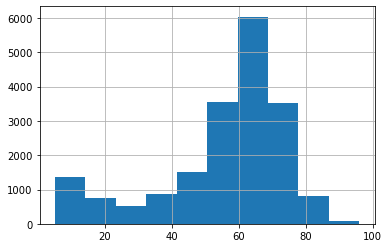

In [13]:
df['<nama_column>'].hist()

<AxesSubplot:>

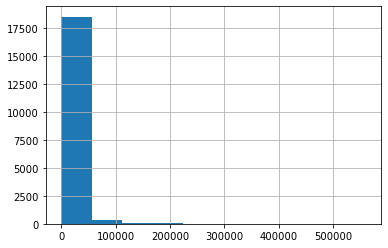

In [15]:
df['int_wage'].hist()

<AxesSubplot:>

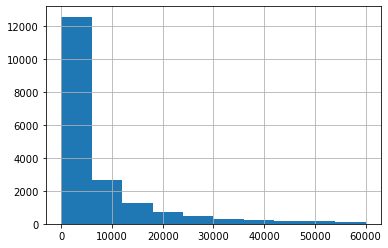

In [21]:
df['int_wage'].loc[df['int_wage'] <= 60000].hist()

NameError: name 'df' is not defined

In [25]:
from datetime import date
from datetime import datetime

def calculate_age(born):
    born = datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [26]:
df['Age'] = df['dt_date_of_birth'].apply(lambda x: calculate_age(x))

In [20]:
df['dt_date_of_birth'].head(2)

0    1987-06-24
1    1985-02-05
Name: dt_date_of_birth, dtype: object